# Debugging Notebook for Week 4, Gradient Descent

## Importing Libraries

In [608]:
import os
import zipfile
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Unzipping files with house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [609]:
# Put files in current directory into a list
files_list = [f for f in os.listdir('.') if os.path.isfile(f)]

In [610]:
# Filenames of unzipped files
unzip_files = ['kc_house_data.csv','kc_house_train_data.csv', 'kc_house_test_data.csv']

In [611]:
# If upzipped file not in files_list, unzip the file
for filename in unzip_files:
    if filename not in files_list:
        zip_file = filename + '.zip'
        zip = zipfile.ZipFile(zip_file)
        zip.extractall()
        zip.close

## Loading and Plotting the house sales data

In [612]:
# Dictionary with the correct dtypes for the DataFrame columns
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 
              'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [613]:
sales = pd.read_csv('kc_house_data.csv', dtype = dtype_dict)
train_data = pd.read_csv('kc_house_data.csv', dtype = dtype_dict)
test_data = pd.read_csv('kc_house_data.csv', dtype = dtype_dict)

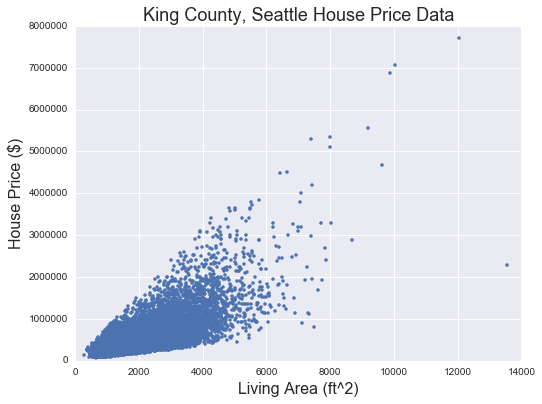

In [614]:
plt.figure(figsize=(8,6))
plt.plot(sales['sqft_living'], sales['price'],'.')
plt.xlabel('Living Area (ft^2)', fontsize=16)
plt.ylabel('House Price ($)', fontsize=16)
plt.title('King County, Seattle House Price Data', fontsize=18)
plt.axis([0.0, 14000.0, 0.0, 8000000.0])
plt.show()

## Trying Gradient Descent

In [615]:
def get_numpy_data(input_df, features, output):
    
    input_df['constant'] = 1.0 # Adding column 'constant' to input DataFrame with all values = 1.0
    features = ['constant'] + features # Adding constant' to List of features

    feature_matrix = input_df.as_matrix(columns=features) # Convert DataFrame w/ columns in features list in np.ndarray
    output_array = input_df[output].values # Convert column with output feature into np.array
    
    return(feature_matrix, output_array)

In [616]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return predictions

In [617]:
simple_features = ['sqft_living']
my_output = 'price'
initial_weights = np.array([0.0, 0.0])
init_weights = initial_weights
step_size = 1e-12
max_iterations=100000
l2_penalty = 0.0
# l2_penalty = 1.0e11

In [618]:
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [619]:
weights = np.array(initial_weights)

In [620]:
feat_reg = np.array( [0.0] + (len(weights)-1)*[l2_penalty] )

In [621]:
for i in range(max_iterations):
    
    predictions = predict_output(simple_feature_matrix, weights)
    
    error_vect = output - predictions
    
    weights = (1.0 - 2.0*feat_reg*step_size)*weights + 2.0*step_size*np.dot( np.transpose(simple_feature_matrix) , error_vect )

In [622]:
print 'L2 penalty = ', l2_penalty
print 'Initial Weights: ', init_weights
print 'Final   Weights: ', weights

L2 penalty =  0.0
Initial Weights:  [ 0.  0.]
Final   Weights:  [ -30.62136298  263.10150916]


In [623]:
l2_penalty = 1.0e11
weights = np.array(initial_weights)
feat_reg = np.array( [0.0] + (len(weights)-1)*[l2_penalty] )

In [624]:
for i in range(max_iterations):
    
    predictions = predict_output(simple_feature_matrix, weights)
    
    error_vect = output - predictions
    
    weights = (1.0 - 2.0*feat_reg*step_size)*weights + 2.0*step_size*np.dot( np.transpose(simple_feature_matrix) , error_vect )

In [625]:
print 'L2 penalty = ', l2_penalty
print 'Initial Weights: ', init_weights
print 'Final   Weights: ', weights

L2 penalty =  1e+11
Initial Weights:  [ 0.  0.]
Final   Weights:  [ 1085.13340757   138.60065798]


In [626]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
initial_weights = np.array([0.0,0.0,0.0])
init_weights = initial_weights
step_size = 1e-12
max_iterations=100000
l2_penalty = 0.0
# l2_penalty = 1.0e11

In [627]:
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [628]:
weights = np.array(initial_weights)

In [629]:
feat_reg = np.array( [0.0] + (len(weights)-1)*[l2_penalty] )

In [630]:
for i in range(max_iterations):
    
    predictions = predict_output(feature_matrix, weights)
    
    error_vect = output - predictions
    
    weights = (1.0 - 2.0*feat_reg*step_size)*weights + 2.0*step_size*np.dot( np.transpose(feature_matrix) , error_vect )

In [631]:
print 'L2 penalty = ', l2_penalty
print 'Initial Weights: ', init_weights
print 'Final   Weights: ', weights

L2 penalty =  0.0
Initial Weights:  [ 0.  0.  0.]
Final   Weights:  [ -45.37143862  240.28733378   25.60088276]


In [632]:
l2_penalty = 1.0e11
weights = np.array(initial_weights)
feat_reg = np.array( [0.0] + (len(weights)-1)*[l2_penalty] )

In [633]:
for i in range(max_iterations):
    
    predictions = predict_output(feature_matrix, weights)
    
    error_vect = output - predictions
    
    weights = (1.0 - 2.0*feat_reg*step_size)*weights + 2.0*step_size*np.dot( np.transpose(feature_matrix) , error_vect )

In [634]:
print 'L2 penalty = ', l2_penalty
print 'Initial Weights: ', init_weights
print 'Final   Weights: ', weights

L2 penalty =  1e+11
Initial Weights:  [ 0.  0.  0.]
Final   Weights:  [ 717.86336774   99.01580925   84.32128837]
